#Cài đặt thư viện

In [ ]:
!pip install vncorenlp

     |████████████████████████████████| 2.6 MB 5.0 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645951 sha256=ef35d7cb9d88a24dd46306f2be7a5354e047d1316409d9a8036ded29fd3528bd
  Stored in directory: /root/.cache/pip/wheels/0c/d8/f2/d28d97379b4f6479bf51247c8dfd57fa00932fa7a74b6aab29
Successfully built vncorenlp


In [ ]:
from vncorenlp import VnCoreNLP
!test -d VnCoreNLP || git clone --depth=1 https://github.com/vncorenlp/VnCoreNLP
annotator = VnCoreNLP("VnCoreNLP/VnCoreNLP-1.1.1.jar",annotators="wseg,pos,parse")

Cloning into 'VnCoreNLP'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 54 (delta 1), reused 40 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [ ]:
import ast
import nltk
from nltk.tag import hmm
import unicodedata as ud
import re
import pandas as pd
from collections import defaultdict
import numpy as np
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Dữ liệu đã thu thập

In [ ]:
sentences = open('/content/drive/MyDrive/NLP_Final/45_sentences/sentences.txt', encoding='utf-8').readlines()
tokenize_sentences = [sentence.split(' ') for sentence in sentences]

In [ ]:
print('Số lượng câu đã thu thập:', len(sentences)+1)

Số lượng câu đã thu thập: 44


In [ ]:
max_str = max(tokenize_sentences, key=len)
print('Câu có số từ nhiều nhất:', len(max_str))
' '.join(max_str)

Câu có số từ nhiều nhất: 117


'Những kết luận trong hai nghiên cứu trên đều xoáy vào tâm điểm của Quy luật thiểu số bởi cả hai nghiên cứu này đều cho rằng , những gì được chúng ta coi là trạng thái bên trong - như sự yêu thích và các loại cảm xúc - thực sự đều chịu sự chi phối mạnh mẽ , không dễ nắm bắt của những ảnh hưởng cá nhân có vẻ như vô lý của một phát thanh viên chúng ta theo dõi vài phút một ngày , hay của một người nào đó chúng ta ngồi cạnh trong im lặng khi tham gia một cuộc thí nghiệm ngắn ngủi chỉ kéo dài hai phút .\n'

In [ ]:
min_str = min(tokenize_sentences, key=len)
print('Câu có số từ ít nhât:', len(min_str))
' '.join(min_str)

Câu có số từ ít nhât: 4


'Tôi là 416 .\n'

#Tách từ

In [ ]:
def load_n_grams(path):
    with open(path, encoding='utf8') as f:
        words = f.read()
        words = ast.literal_eval(words)
    return words

In [ ]:
def count_compounds(sents):
  count = 0
  for sent in sents:
    for word in sent.split():
        if '_' in word: count+= 1
  return count

Tập từ vựng

In [ ]:
vocabs = open('/content/drive/MyDrive/NLP_Final/n_grams/vocabs.txt', encoding='utf-8').read().split('\n')
vocabs_dict = {}
index = 0

for word in sorted(vocabs): 
    if word not in vocabs_dict: 
        vocabs_dict[word] = index  
        index += 1

print('Số lượng từ vựng: ', len(vocabs_dict.keys()))

Số lượng từ vựng:  54817


Tập từ ghép

In [ ]:
n_grams_dict = load_n_grams('/content/drive/MyDrive/NLP_Final/n_grams/bi_grams.txt').union(load_n_grams('/content/drive/MyDrive/NLP_Final/n_grams/tri_grams.txt'))

##Phương pháp Maximum Matching

In [ ]:
def tokenizer(text, dict, is_show = False):
    input = text.split(' ')
    words = []
    s = 0
    while True:
        e = len(input)
        while e > s:
            tmp_word = input[s:e]
            is_word = ''
            for item in tmp_word:
                is_word += item + ' '
            is_word = is_word[:-1]
            e -= 1
            if is_word.lower() in dict:
                words.append(is_word)
                break
            if e == s:
                words.append(is_word)
                break
                
        if e >= len(input):
            break
        
        if is_show:
            print('s = ', s)
            print('e = ', e)
            print(words[len(words)-1])
            print('-'*100)
        s = e + 1
        
    output = ''
    for item in words:
        output += item.replace(' ', '_')
        output += ' '
    output = output[:-1]
    
    return output

In [ ]:
with open('/content/drive/MyDrive/NLP_Final/Token_data/lm_token.txt', 'w', encoding='utf-8') as f:
    longest_matching_sentences = []
    for sentence in sentences:
        token = tokenizer(sentence, n_grams_dict)
        word_list = token.replace('\n','').split(' ')
        longest_matching_sentences.append(token)
        for word in word_list:
          f.write(word + '\n')
        f.write('\n')
longest_matching_sentences[0:3]

['Trong Chương 2 , khi đề_cập đến các yếu_tố khiến những người như Mark Alper trở_nên hết_sức quan_trọng trong những đại_dịch truyền_khẩu , tôi có nói đến hai khía_cạnh dường_như không_thể giải_thích được trong quá_trình thuyết_phục .\n',
 'Đầu_tiên , như một nghiên_cứu đã chỉ ra , là vấn_đề tại_sao số người theo_dõi chương_trình trên kênh ABC có phát_thanh_viên Peter Jennings có khả_năng sẽ bầu cho đảng Dân_chủ nhiều hơn những người theo_dõi chương_trình của Tom Brokaw hay Dan Rather ?\n',
 'Câu trả_lời ở đây là Jennings có khả_năng biểu_lộ vô_thức thiện_cảm của mình với ứng_cử_viên của đảng Dân_chủ .\n']

##Tách từ bằng thư viện VNCoreNLP

In [ ]:
with open('/content/drive/MyDrive/NLP_Final/Token_data/vncorenlp_token.txt', 'w', encoding='utf-8') as f:
    vncorenlp_tokens = []
    for sentence in sentences:
        word_list = annotator.tokenize(sentence)[0]
        vncorenlp_tokens.append(' '.join(word_list))
        for word in word_list:
          f.write(str(word) + '\n')
        f.write('\n')
vncorenlp_tokens[:3]

['Trong Chương 2 , khi đề_cập đến các yếu_tố khiến những người như Mark_Alper trở_nên hết_sức quan_trọng trong những đại_dịch truyền_khẩu , tôi có nói đến hai khía_cạnh dường_như không_thể giải_thích được trong quá_trình thuyết_phục .',
 'Đầu_tiên , như một nghiên_cứu đã chỉ ra , là vấn_đề tại_sao số người theo_dõi chương_trình trên kênh ABC có phát_thanh_viên Peter_Jennings có khả_năng sẽ bầu cho đảng Dân_chủ nhiều hơn những người theo_dõi chương_trình của Tom_Brokaw hay Dan_Rather ?',
 'Câu trả_lời ở đây là Jennings có khả_năng biểu_lộ vô_thức thiện_cảm của mình với ứng_cử_viên của đảng Dân_chủ .']

##Tách từ thủ công

In [ ]:
token_sents = open('/content/drive/MyDrive/NLP_Final/45_sentences/tokened_sents.txt', 'r', encoding='utf-8').readlines()
with open('/content/drive/MyDrive/NLP_Final/Token_data/manual_token.txt', 'w', encoding='utf-8') as f:
  manual_tokens = []
  for token_sent in token_sents:
    manual_tokens.append(token_sent.replace('\n',''))
    for word in token_sent.replace('\n','').split(' '):
      f.write(word + '\n')
    f.write('\n')
manual_tokens[:3]

['Trong Chương 2 , khi đề_cập đến các yếu_tố khiến những người như Mark_Alper trở_nên hết_sức quan_trọng trong những đại_dịch truyền_khẩu , tôi có nói_đến hai khía_cạnh dường_như không_thể giải_thích được trong quá_trình thuyết_phục .',
 'Đầu_tiên , như một nghiên_cứu đã chỉ_ra , là vấn_đề tại_sao số người theo_dõi chương_trình trên kênh ABC có phát_thanh_viên Peter_Jennings có khả_năng sẽ bầu cho đảng Dân_chủ nhiều hơn những người theo_dõi chương_trình của Tom_Brokaw hay Dan_Rather ?',
 'Câu trả_lời ở_đây là Jennings có khả_năng biểu_lộ vô_thức thiện_cảm của mình với ứng_cử_viên của đảng Dân_chủ .']

##Đánh giá kết quả tách từ

In [ ]:
#Số lượng từ ghép sau khi tách từ
print('Longest Matching:', count_compounds(longest_matching_sentences))
print('Sử dụng thư viện VNCoreNLP:', count_compounds(vncorenlp_tokens))
manual_tokens_compounds = count_compounds(open('/content/drive/MyDrive/NLP_Final/Token_data/manual_token.txt', encoding='utf-8').readlines())
print('Thủ công:', manual_tokens_compounds)

Longest Matching: 279
Sử dụng thư viện VNCoreNLP: 289
Thủ công: 360


In [ ]:
def count_correct_words(pred, gt):
    pred_words = pred.split()
    gt_words = gt.split()
    
    total_true, tp = 0, 0
    total_errors, fp = 0, 0
    
    for idx in range(len(gt_words)):
      if gt_words[idx] in pred_words:
        if '_' in gt_words[idx]:
          tp += 1
        total_true += 1
        pred_words.remove(gt_words[idx])
    
    for idx in range(len(pred_words)):
      if '_' in pred_words[idx]:
        fp += 1
    total_errors += len(pred_words)
                    
    return total_true, total_errors, tp, fp

In [ ]:
def tokenize_evaluation(pred, gt):
    total_true = 0
    total_errors = 0
    total_words = 0
    
    pred_tp = 0
    pred_fp = 0
    
    for pred_sentence, gt_sentence in list(zip(pred, gt)):
        total_words += len(gt_sentence.split())
        true, error, tp, fp = count_correct_words(pred_sentence, gt_sentence)
        total_true += true 
        total_errors += error
        pred_tp += tp
        pred_fp += fp
    return {
        'Accuracy': total_true / total_words, 
        'Precision': pred_tp / (pred_tp + pred_fp),
        'Recall': pred_tp / manual_tokens_compounds,
        'True Positive': pred_tp, 
        'False Positive': pred_fp,
        'Total True': total_true, 
        'Total Errors': total_errors
    }

In [ ]:
longest_matching_evaluation = tokenize_evaluation(longest_matching_sentences, manual_tokens)
vncore_evaluation = tokenize_evaluation(vncorenlp_tokens, manual_tokens)
pd.DataFrame(
    [longest_matching_evaluation, vncore_evaluation], 
    index = ['Longest Matching', 'VnCoreNLP']
).astype(object).T

,Longest Matching,VnCoreNLP
Accuracy,0.88,0.890233
Precision,0.917563,0.913495
Recall,0.711111,0.733333
True Positive,256,264
False Positive,23,25
Total True,946,957
Total Errors,220,193


#Tạo dataset

##Chia Train/Test

In [ ]:
manual_tokens = open('/content/drive/MyDrive/NLP_Final/Token_data/manual_token.txt', encoding='utf-8').readlines()

In [ ]:
with open('/content/drive/MyDrive/NLP_Final/Dataset/gold.txt', 'w', encoding='utf-8') as f:
    for word in manual_tokens:
        word = word.replace('\n', '')
        
        if '_' not in word: tag = annotator.pos_tag(word)
        else: tag = annotator.pos_tag(word.replace('_', ' '))
        
        if tag == []: f.write('\n')
        else: f.write(f'{word}\t{tag[0][0][1]}\n')

In [ ]:
gold_corpus = open('/content/drive/MyDrive/NLP_Final/Dataset/gold.txt', encoding='utf-8').readlines()
new_line_idx = [i for i, item in enumerate(manual_tokens) if item == '\n']

In [ ]:
with open('/content/drive/MyDrive/NLP_Final/Dataset/train_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[34]]: f.write(line)
    f.write('\n')
    
with open('/content/drive/MyDrive/NLP_Final/Dataset/test_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[34] + 1:]: f.write(line)

In [ ]:
with open('/content/drive/MyDrive/NLP_Final/Dataset/train.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[34]]: f.write(re.sub('\t.*', '', line))
    f.write('\n')        
    
with open('/content/drive/MyDrive/NLP_Final/Dataset/test.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[34] + 1:]: f.write(re.sub('\t.*', '', line))

##Thống kê các nhãn trong tập gold (ground truth)

In [ ]:
def plot_tag_counts(gold):
    tags = [word_tag.split()[1] for word_tag in gold if word_tag.split()]
    tag_counts = pd.DataFrame(tags)[0].value_counts()
    tag_counts.plot.bar(rot=0, width=0.7, legend=False, figsize=(15, 5))
    return pd.DataFrame(tag_counts).T.assign(Total=tag_counts.sum()) 

,V,N,E,CH,A,P,L,R,M,C,Cc,Np,X,T,Total
0,222,211,84,73,56,45,39,35,32,20,18,14,5,4,858


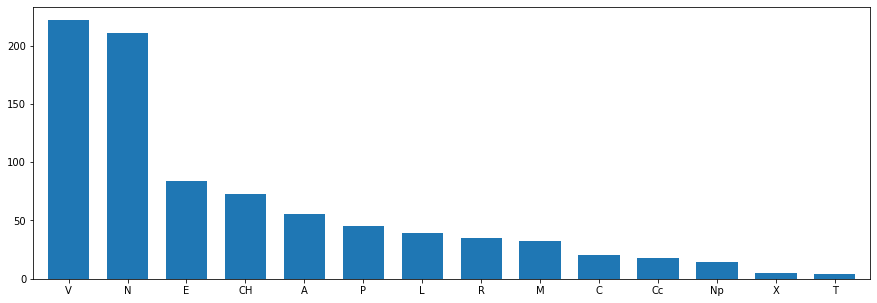

In [ ]:
#Train
train_gold = open('/content/drive/MyDrive/NLP_Final/Dataset/train_gold.txt', encoding='utf-8').readlines()
plot_tag_counts(train_gold)

,V,N,CH,P,R,M,E,C,A,Cc,T,Np,L,X,Total
0,58,36,26,23,15,15,13,11,9,5,3,1,1,1,217


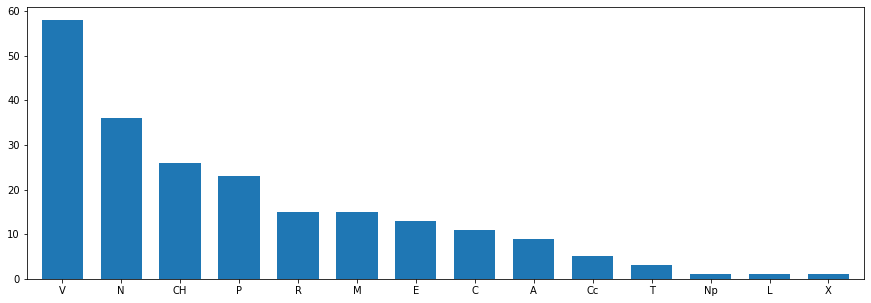

In [ ]:
#Test
test_gold = open('/content/drive/MyDrive/NLP_Final/Dataset/test_gold.txt', encoding='utf-8').readlines()
plot_tag_counts(test_gold)

#Hidden Markov Model

In [ ]:
def preprocess(vocabs_dict, path):
    data = []
    file = open(path, encoding='utf-8').readlines()
    
    for index, word in enumerate(file):
        if not word.split():
            word = '--n--'
            data.append(word)
            continue
        elif word.strip() not in vocabs_dict:
            word = '--unk--'
            data.append(word)
            continue
        data.append(word.strip())
    return data

In [ ]:
def seperate_word_tag(word_tag, vocabs_dict): 
    if not word_tag.split():
        word = '--n--'
        tag = '--s--'
    else:
        word, tag = word_tag.split()
        if word not in vocabs_dict: word = '--unk--'
    return word, tag

In [ ]:
def create_dictionaries(train_gold, vocab):
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)
    
    prev_tag = '--s--' 
    for word_tag in train_gold:
        word, tag = seperate_word_tag(word_tag, vocab) 
        
        transition_counts[(prev_tag, tag)] += 1
        emission_counts[(tag, word)] += 1
        tag_counts[tag] += 1
        prev_tag = tag
    return transition_counts, emission_counts, tag_counts

In [ ]:
transition_counts, emission_counts, tag_counts = create_dictionaries(train_gold, vocab_dict)
states = sorted(tag_counts.keys())

Ma trận A (Trasition Mattrix)

In [ ]:
def create_transition_matrix(alpha, tag_counts, transition_counts):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(all_tags)
    
    A = np.zeros((num_tags, num_tags))
    trans_keys = set(transition_counts.keys())
    
    for i in range(num_tags):
        for j in range(num_tags):
            count = 0
            key = (all_tags[i], all_tags[j])
            if key in transition_counts: count = transition_counts[key]
                
            count_prev_tag = tag_counts[all_tags[i]]
            A[i, j] = (count + alpha) / (count_prev_tag + alpha * num_tags)
    return A

In [ ]:
alpha = 0.001
for i in range(len(states)): tag_counts.pop(i, None)
    
A = create_transition_matrix(alpha, tag_counts, transition_counts)
df = pd.DataFrame(
    A[5:10, 5:10], 
    index = states[5:10], 
    columns = states[5:10]
)
df.head()

,E,L,M,N,Np
E,0.035720,0.107136,0.047622,0.523728,0.011915
L,0.000026,0.000026,0.000026,0.768961,0.000026
M,0.062502,0.000031,0.000031,0.655974,0.000031
N,0.146914,0.009483,0.028439,0.132697,0.023700
Np,0.142776,0.000071,0.000071,0.000071,0.000071


Ma trận B (Emission Matrix)

In [ ]:
def create_emission_matrix(alpha, tag_counts, emission_counts, vocabs):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(tag_counts)
    num_words = len(vocabs)
    
    B = np.zeros((num_tags, num_words))
    emis_keys = set(list(emission_counts.keys()))
    
    for i in range(num_tags):
        for j in range(num_words):
            count = 0
            key = (all_tags[i], vocabs[j])
            if key in emission_counts.keys(): count = emission_counts[key]
                
            count_tag = tag_counts[all_tags[i]]
            B[i, j] = (count + alpha) / (count_tag + alpha * num_words)
    return B

In [ ]:
cidx  = ['nghiên_cứu', 'tù_nhân', 'tình_nguyện', 'tham_gia', 'nhà_tù']
rvals = ['N', 'V', 'CH', 'C', 'E', 'L']
cols = [vocabs_dict[word] for word in cidx]
rows = [states.index(tag) for tag in rvals]

for i in range(len(states)): tag_counts.pop(i, None)
B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocabs_dict))

df = pd.DataFrame(B[np.ix_(rows, cols)], index=rvals, columns=cidx)
df.head()

,nghiên_cứu,tù_nhân,tình_nguyện,tham_gia,nhà_tù
N,0.000004,0.018814,0.000004,0.000004,0.007528
V,0.010841,0.000004,0.003616,0.007229,0.000004
CH,0.000008,0.000008,0.000008,0.000008,0.000008
C,0.000013,0.000013,0.000013,0.000013,0.000013
E,0.000007,0.000007,0.000007,0.000007,0.000007


#Thuật toán Viterbi

In [ ]:
A = np.array([sublist[1:].tolist() for sublist in A])
B = B[1:]

In [ ]:
def viterbi_initialize(states, tag_counts, A, B, corpus, vocabs_dict):
    num_tags = len(tag_counts)
    s_idx = states.index('--s--')
    
    best_probs = np.zeros((num_tags, len(corpus)))
    best_paths = np.zeros((num_tags, len(corpus)), dtype=int)
    
    for i in range(num_tags):
        if A[s_idx, i - 1] == 0: best_probs[i, 0] = float('-inf')
        else: 
            index = vocabs_dict[corpus[0]]
            # best_probs[i, 0] = math.log(A[s_idx, i]) + math.log(B[i, index])
            best_probs[i, 0] = math.log(A[s_idx, i - 1]) + math.log(B[i - 1, index])
    return best_probs, best_paths

In [ ]:
def viterbi_forward(A, B, corpus, best_probs, best_paths, vocabs_dict):
    num_tags = best_probs.shape[0]
    
    for i in range(1, len(corpus)): 
        if i % 5000 == 0: print(f'Processed {i} words...')
            
        for j in range(num_tags):
            best_prob_i = float('-inf')
            best_path_i = None
            
            for k in range(num_tags):
                index = vocabs_dict[corpus[i]]
                # prob = best_probs[k, i - 1] + math.log(A[k, j]) + math.log(B[j, index])
                prob = best_probs[k, i - 1] + math.log(A[k, j - 1]) + math.log(B[j - 1, index])

                if prob > best_prob_i:
                    best_prob_i = prob
                    best_path_i = k
                    
            best_probs[j, i] = best_prob_i
            best_paths[j, i] = best_path_i
            
    return best_probs, best_paths

In [ ]:
def viterbi_backward(best_probs, best_paths, corpus, states):
    m = best_paths.shape[1] 
    z = [None] * m
    pred = [None] * m
    
    best_prob_for_last_word = float('-inf')
    num_tags = best_probs.shape[0]
    
    for k in range(num_tags):
        if best_probs[k, m - 1] > best_prob_for_last_word:
            best_prob_for_last_word = best_probs[k, m - 1]
            z[m - 1] = k
            
    pred[m - 1] = states[z[m - 1]]
    for i in range(m - 1, -1, -1):
        z[i - 1] = best_paths[z[i], i]
        pred[i - 1] = states[z[i - 1]]
    return pred

In [ ]:
test_words = preprocess(vocabs_dict, '/content/drive/MyDrive/NLP_Final/Dataset/test.txt')
best_probs_test, best_paths_test = viterbi_initialize(states, tag_counts, A, B, test_words, vocabs_dict)
best_probs_test, best_paths_test = viterbi_forward(A, B, test_words, best_probs_test, best_paths_test, vocabs_dict)
test_pred = viterbi_backward(best_probs_test, best_paths_test, test_words, states)

#Đánh giá kết quả mô hình HMM + Viterbi Algorithm

In [ ]:
for word, tag in zip(test_words, test_pred):
    if word == '--n--': print()
    else: print(f'{word}/{tag}', end=' ')

--unk--/N 36/E giờ/N đồng_hồ/A ,/CH một/M tù_nhân/N đã/R bị/V kích_động/N và/Cc cần/V phải/V được/V --unk--/N ./CH 
--unk--/N ,/CH bốn/L người/N khác/A cũng/R phải/V được/V thả/A vì/E họ/P suy_nhược/R thần_kinh/V trầm_trọng/N ,/CH --unk--/N ,/CH giận_dữ/P và/Cc lo_sợ/V đến/V cùng_cực/N ./CH 
--unk--/N ,/CH --unk--/N dự_định/R thực_hiện/V thí_nghiệm/V này/P trong/E thời_gian/N hai/M tuần/N ./CH 
Song/N ,/CH ông/N phải/V tuyên_bố/A chấm_dứt/R thí_nghiệm/V chỉ/R sau/A sáu/E ngày/N ./CH 
--unk--/N thí_nghiệm/V kết_thúc/N ,/CH một/M tù_nhân/N giả/A thú_nhận/A :/CH --unk--/N tôi/P --unk--/V rằng/N ,/CH dù/C tôi/P có/V cố_gắng/V hình_dung/A trong/E đầu/N tôi/P là/V người/N như/C thế_nào/X đi/C chăng/--s-- nữa/T thì/CH những/L hành_vi/N khi/N là/V một/M tù_nhân/N luôn/R --unk--/V tầm/E kiểm_soát/L lý_trí/N của/E tôi/P ./CH 
--unk--/V người/N khác/A cho/E biết/V thêm/N :/CH 
Tôi/P bắt_đầu/V cảm_thấy/E mình/P đang/R --unk--/V nhân_cách/N ,/CH --unk--/V con_người/N mà/C tôi/P vẫn/R hình_dung/A về

In [ ]:
from sklearn.metrics import classification_report
def report(pred, gold):
    y_pred = []
    y_true = []

    for prediction, word_tag in zip(pred, gold):
        word_tag_tuple = word_tag.split()
        if len(word_tag_tuple) != 2: continue 

        word, tag = word_tag_tuple
        y_pred.append(prediction)
        y_true.append(tag)
        
    print(classification_report(y_pred, y_true))
    return y_pred, y_true

In [ ]:
test_gold = open('/content/drive/MyDrive/NLP_Final/Dataset/test_gold.txt', encoding='utf-8').readlines()
print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:\n')
y_pred, y_true_test = report(test_pred, test_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:

              precision    recall  f1-score   support

       --s--       0.00      0.00      0.00         1
           A       0.33      0.23      0.27        13
           C       0.45      0.83      0.59         6
          CH       0.85      0.92      0.88        24
          Cc       1.00      1.00      1.00         5
           E       0.69      0.53      0.60        17
           L       1.00      0.25      0.40         4
           M       0.60      1.00      0.75         9
           N       0.86      0.63      0.73        49
          Np       0.00      0.00      0.00         0
           P       0.91      0.95      0.93        22
           R       0.80      0.71      0.75        17
           T       0.33      1.00      0.50         1
           V       0.67      0.81      0.74        48
           X       1.00      1.00      1.00         1

    accuracy                           0.73       217
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Sử dụng VNCoreNLP

In [ ]:
y_pred = []
for word_tag in test_gold:
    word_tag_tuple = word_tag.split()
    if len(word_tag_tuple) != 2: 
        print()
        continue

    word, tag = word_tag_tuple
    if '_' not in word: pred = annotator.pos_tag(word)
    else: pred = annotator.pos_tag(word.replace('_', ' '))

    print(f'{word}/{pred[0][0][1]}', end=' ') 
    y_pred.append(pred[0][0][1])

Sau/E 36/M giờ/N đồng_hồ/N ,/CH một/M tù_nhân/N đã/R bị/V kích_động/V và/Cc cần/V phải/V được/V thả_ra/V ./CH 
Sau_đó/E ,/CH bốn/M người/N khác/A cũng/R phải/V được/V thả/V vì/E họ/P suy_nhược/V thần_kinh/N trầm_trọng/A ,/CH la_khóc/V ,/CH giận_dữ/A và/Cc lo_sợ/V đến/V cùng_cực/A ./CH 
Ban_đầu/N ,/CH Zimbardo/Np dự_định/V thực_hiện/V thí_nghiệm/V này/P trong/E thời_gian/N hai/M tuần/N ./CH 
Song/Np ,/CH ông/N phải/V tuyên_bố/V chấm_dứt/V thí_nghiệm/V chỉ/R sau/N sáu/M ngày/N ./CH 
Ngay_khi/T thí_nghiệm/V kết_thúc/V ,/CH một/M tù_nhân/N giả/A thú_nhận/V :/CH Bây_giờ/P tôi/P nhận_ra/V rằng/C ,/CH dù/C tôi/P có/V cố_gắng/V hình_dung/V trong/E đầu/N tôi/P là/V người/N như/C thế_nào/X đi/V chăng/V nữa/T thì/C những/L hành_vi/N khi/N là/V một/M tù_nhân/N luôn/R vượt_khỏi/V tầm/N kiểm_soát/V lý_trí/V của/E tôi/P ./CH 
Một/M người/N khác/A cho/E biết/V thêm/V :/CH 
Tôi/P bắt_đầu/V cảm_thấy/V mình/P đang/R mất_đi/V nhân_cách/N ,/CH mất_đi/V con_người/N mà/C tôi/P vẫn/R hình_dung/V về/E bản_thân

In [ ]:
print('Kết quả khi sử dụng thư viện VnCoreNLP trên tập test:\n')
print(classification_report(y_pred, y_true_test))

Kết quả khi sử dụng thư viện VnCoreNLP trên tập test:

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         9
           C       0.91      1.00      0.95        10
          CH       1.00      1.00      1.00        26
          Cc       1.00      1.00      1.00         5
           E       1.00      1.00      1.00        13
           L       1.00      1.00      1.00         1
           M       1.00      1.00      1.00        15
           N       0.94      1.00      0.97        34
          Np       1.00      0.50      0.67         2
           P       1.00      0.96      0.98        24
           R       0.93      1.00      0.97        14
           T       1.00      1.00      1.00         3
           V       1.00      0.97      0.98        60
           X       1.00      1.00      1.00         1

    accuracy                           0.98       217
   macro avg       0.98      0.96      0.97       217
weighted avg       0.98  